# Import libraries

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load data

In [67]:
data = pd.read_csv("disease_diagnosis.csv")
data.head()

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids


In [95]:
data["Severity"].unique()

array(['Moderate', 'Mild', 'Severe'], dtype=object)

# EDA

In [68]:
data.shape

(2000, 13)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           2000 non-null   int64  
 1   Age                  2000 non-null   int64  
 2   Gender               2000 non-null   object 
 3   Symptom_1            2000 non-null   object 
 4   Symptom_2            2000 non-null   object 
 5   Symptom_3            2000 non-null   object 
 6   Heart_Rate_bpm       2000 non-null   int64  
 7   Body_Temperature_C   2000 non-null   float64
 8   Blood_Pressure_mmHg  2000 non-null   object 
 9   Oxygen_Saturation_%  2000 non-null   int64  
 10  Diagnosis            2000 non-null   object 
 11  Severity             2000 non-null   object 
 12  Treatment_Plan       2000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 203.3+ KB


In [70]:
data.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Heart_Rate_bpm         0
Body_Temperature_C     0
Blood_Pressure_mmHg    0
Oxygen_Saturation_%    0
Diagnosis              0
Severity               0
Treatment_Plan         0
dtype: int64

In [71]:
data.duplicated().sum()

0

In [72]:
data.describe()

,Patient_ID,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.285000,89.439000,37.741000,94.493500
std,577.494589,17.422616,17.139608,1.309835,2.861827
min,1.000000,18.000000,60.000000,35.500000,90.000000
25%,500.750000,33.000000,75.000000,36.600000,92.000000
50%,1000.500000,49.000000,89.000000,37.700000,95.000000
75%,1500.250000,63.000000,104.000000,38.900000,97.000000
max,2000.000000,79.000000,119.000000,40.000000,99.000000


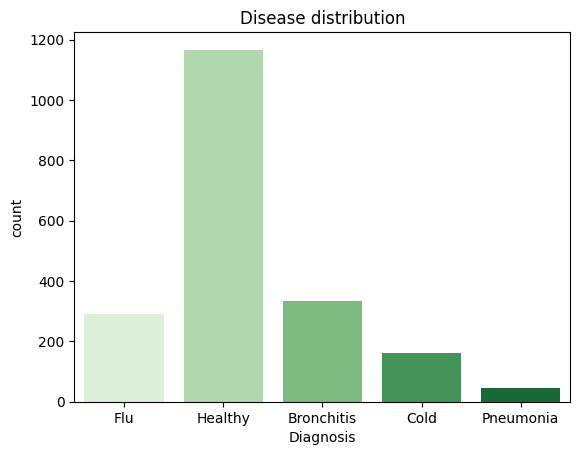

In [73]:
# Visualization
sns.countplot(x="Diagnosis",data=data,palette="Greens")
plt.title("Disease distribution")
plt.show()

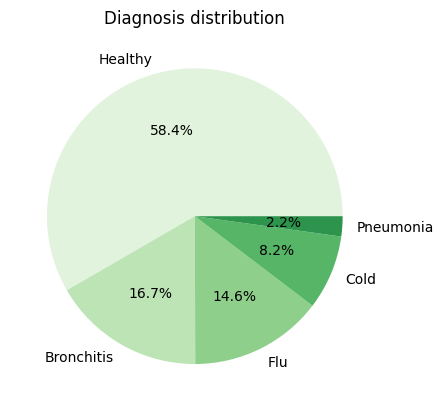

In [74]:
# Percentage of disease distribution
data["Diagnosis"].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Greens"))
plt.title("Diagnosis distribution")
plt.ylabel("")
plt.show()

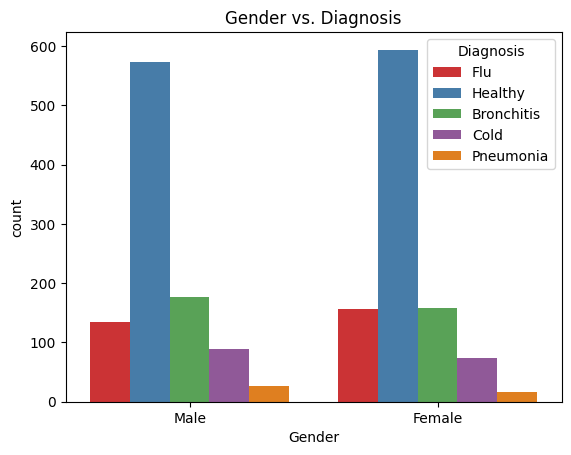

In [75]:
sns.countplot(x="Gender", hue="Diagnosis", data=data, palette="Set1")
plt.title("Gender vs. Diagnosis")
plt.show()

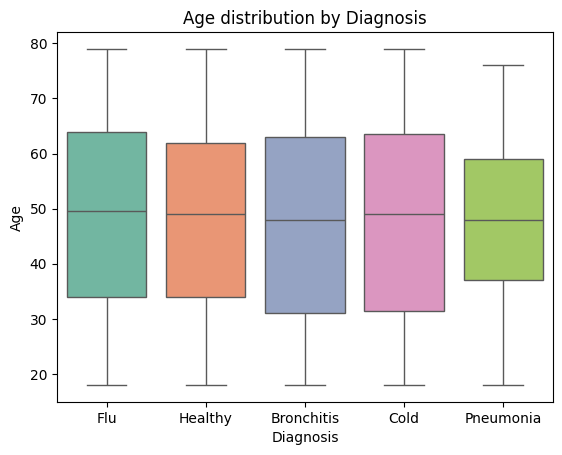

In [76]:
sns.boxplot(x="Diagnosis", y="Age", data=data, palette="Set2")
plt.title("Age distribution by Diagnosis")
plt.show()

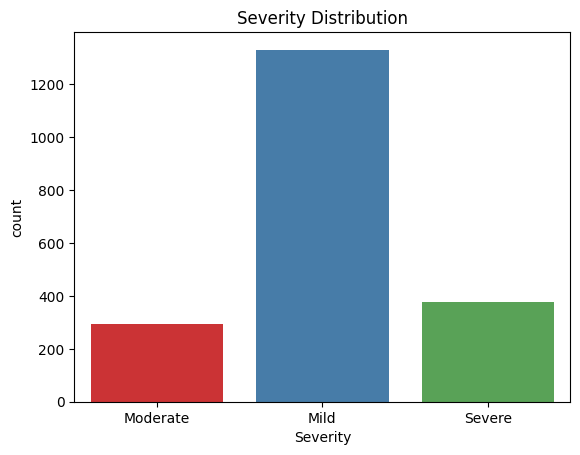

In [77]:
sns.countplot(x="Severity", data=data, palette="Set1")
plt.title("Severity Distribution")
plt.show()

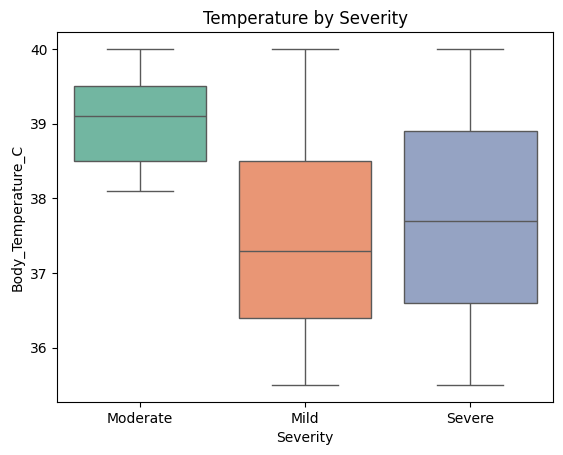

In [78]:
sns.boxplot(x="Severity", y="Body_Temperature_C", data=data, palette="Set2")
plt.title("Temperature by Severity")
plt.show()

# Prepare data for model creation

In [79]:
data.head(3)

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids


In [80]:
# preprocessing for Blood Pressure
bp_split = data["Blood_Pressure_mmHg"].str.split("/", expand=True).astype(float)
data["Systolic_BP"] = bp_split[0]
data["Diastolic_BP"] = bp_split[1]

In [81]:
# drop unwanted columns
data.drop(columns=["Blood_Pressure_mmHg","Patient_ID"], inplace=True)

In [82]:
# Define target and features
x = data.drop(columns=["Diagnosis"])
y = data["Diagnosis"]

In [83]:
# Split train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
# Separate feature types
num_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = x.select_dtypes(include=['object']).columns.tolist()
print("Numerical features:", num_cols)
print("Categorical features:", cat_cols)

Numerical features: ['Age', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%', 'Systolic_BP', 'Diastolic_BP']
Categorical features: ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Severity', 'Treatment_Plan']


In [85]:
# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [86]:
# Build pipeline with Random Forest
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
    ))
])

In [87]:
# Train model
rf_clf.fit(x_train, y_train)

# 8. Predictions
y_pred = rf_clf.predict(x_test)

In [88]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 99.25

Classification Report:
               precision    recall  f1-score   support

  Bronchitis       0.96      1.00      0.98        64
        Cold       1.00      1.00      1.00        29
         Flu       1.00      1.00      1.00        58
     Healthy       1.00      1.00      1.00       238
   Pneumonia       1.00      0.73      0.84        11

    accuracy                           0.99       400
   macro avg       0.99      0.95      0.96       400
weighted avg       0.99      0.99      0.99       400



In [89]:
with open("disease_diagnosis_model.pkl", "wb") as f:
    pickle.dump(rf_clf, f)